# Data

In [1]:
import pandas as pd
doc2topic = pd.read_csv("doc2topic.csv")
doc2topic.set_index("doc_id",inplace=True)

emotions = pd.read_pickle("../data/emotions_compressed.pkl.gz")
emotions = emotions.join(doc2topic['topic'])

# check against aggregated emotions

emotions_agg = pd.read_csv("emotions.csv")
emotions_agg.set_index("Topic",inplace=True)
assert (emotions.groupby('topic').mean()-emotions_agg).abs().max().max() < 1e-4

/tmp/ipykernel_442070/1161005462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Insights

Biggest fear occurs in topics related to pandemia and the war on Ukraine.

In [2]:
emotions_agg.sort_values("fear",ascending=False).head(6)

,sadness,disgust,pessimism,anger,anticipation,joy,fear,optimism,surprise,trust,love
Topic,,,,,,,,,,,
2,0.072572,0.283825,0.068204,0.258969,0.404288,0.137749,0.481284,0.214518,0.073049,0.064235,0.010926
56,0.112782,0.396744,0.080592,0.362464,0.350235,0.105353,0.478799,0.155787,0.081483,0.047406,0.008637
61,0.208532,0.239893,0.145550,0.179963,0.376131,0.147433,0.404765,0.337837,0.057601,0.074166,0.011487
99,0.144684,0.170082,0.085544,0.125447,0.389993,0.317713,0.328546,0.398602,0.064985,0.065424,0.023875
60,0.226947,0.312838,0.135836,0.255518,0.375404,0.190973,0.275193,0.305734,0.075159,0.069927,0.015099
19,0.082476,0.198030,0.072334,0.182618,0.507511,0.299126,0.254994,0.446743,0.073088,0.127018,0.021420


# Statistical Remarks

Note that the standard deviations are huge and emotion comparison is inconclusive.

In [3]:
emotions_agg_mu = emotions.groupby("topic").median().round(3)
emotions_agg_std = emotions.groupby("topic").std().round(3)

pd.concat([emotions_agg_mu.astype(str),emotions_agg_std.astype(str)]).groupby("topic").agg(lambda s: '+'.join(map(str,s))).loc[[60,61,99]]

,sadness,disgust,pessimism,anger,anticipation,joy,fear,optimism,surprise,trust,love
topic,,,,,,,,,,,
60,0.103+0.267,0.175+0.304,0.091+0.133,0.102+0.294,0.367+0.236,0.052+0.267,0.146+0.287,0.166+0.312,0.051+0.073,0.034+0.084,0.006+0.039
61,0.097+0.243,0.123+0.256,0.102+0.129,0.068+0.239,0.38+0.214,0.046+0.223,0.335+0.312,0.205+0.32,0.042+0.057,0.036+0.088,0.006+0.027
99,0.053+0.212,0.087+0.212,0.047+0.102,0.053+0.191,0.398+0.211,0.193+0.311,0.273+0.278,0.363+0.304,0.05+0.056,0.043+0.068,0.008+0.069


This is partly because emotion distributions are not only skewed but also multimodal.

<Axes: ylabel='Frequency'>

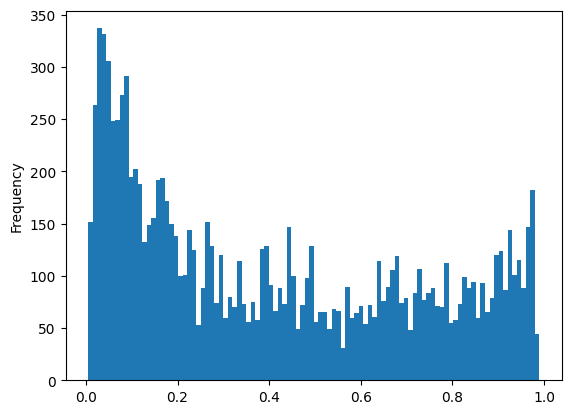

In [4]:
mask = emotions['topic']==61

emotions.loc[mask,'fear'].plot(kind='hist',bins=100)